In [1]:
#import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import data

df = pd.read_csv(r'C:\Users\chris\OneDrive\Documents\Mock Employment Data Set.csv')

#taking a look at the data set
print(df.head())
print(df.info())

#removing columns unnamed 9-12 as they contain all null values

empty = ['Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12']
df = df.drop(empty, axis=1)

#Changing Start Date to datetime format
df['Start Date']= pd.to_datetime(df['Start Date'])

   Employee Number      Business Unit  Gender  Start Date        Country  \
0                1               Risk    Male   8/21/2021  United States   
1                2  Business Services  Female   12/3/2021          India   
2                3               Risk  Female  12/30/2021         Canada   
3                4          Marketing  Female    3/2/2022         Mexico   
4                5            Finance    Male  11/30/2021  United States   

  Ethnicity  Band Executive Potential Employment Status  Unnamed: 9  \
0  Hispanic    10                 NaN            Active         NaN   
1       NaN     5                 NaN            Active         NaN   
2       NaN    30                High            Active         NaN   
3       NaN     5                 NaN            Active         NaN   
4     White    15                 NaN            Active         NaN   

   Unnamed: 10  Unnamed: 11  Unnamed: 12  
0          NaN          NaN          NaN  
1          NaN          NaN   

In [3]:
#Defining functions for finding and plotting attrition rates

def attrition_rate(column, df):
    '''This function determines the annualized attrition rate grouped by the given column name'''
    
    agg_df = df.groupby(by=[column, 'Employment Status']
                       ).agg({'Employee Number': 'count'})
    agg_df.reset_index(drop=False, inplace=True)
    
    pivot_df = agg_df.pivot(columns=['Employment Status'],
                             index=[column], 
                             values='Employee Number')
    pivot_df.fillna(0, inplace=True)
    
    pivot_df['Total'] = pivot_df['Active'] + pivot_df['Inactive']
    pivot_df['annualized_attrition_pct'] = pivot_df['Inactive'] / pivot_df['Total'] * 1200
    
    return pivot_df

def attrition_graph(rate, color, category):
    
    '''Plots the annualized attrition percentage by given category, as well as a second plot
    of the number of employees per category'''
    
    fig, ax = plt.subplots(1,2, figsize=(12,8))
    chart = sns.barplot(x=rate.index, 
                        y='annualized_attrition_pct', 
                        data=rate,
                        palette=color,
                        ax=ax[0])
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
    chart.set_title('Annualized Attrition Percentage by ' + category)

    attrition_count = sns.barplot(x=rate.index,
                                  y='Inactive',
                                  data=rate,
                                  palette=color,
                                  ax=ax[1])
    
    attrition_count.set_xticklabels(attrition_count.get_xticklabels(), rotation=45)
    attrition_count.set_ylabel('Number of Employees')
    attrition_count.set_title('Number of Employees Attrited by ' + category)

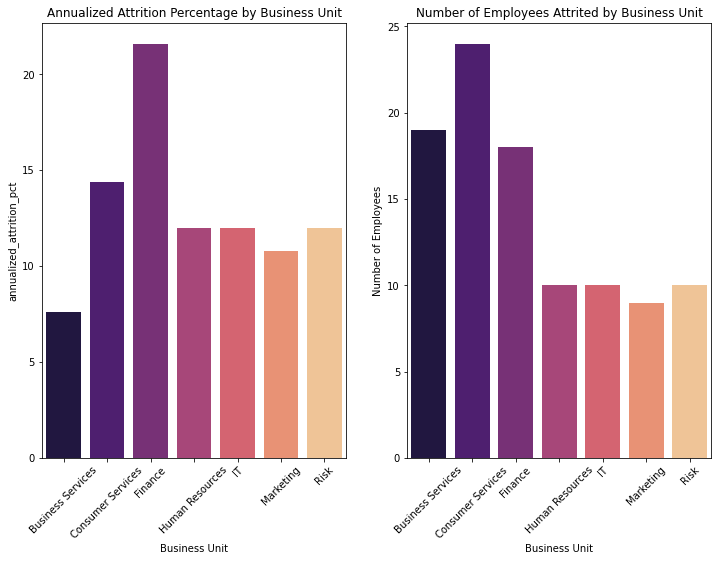

In [4]:
#Exploring annualized attrition rate for each business unit

rate_by_unit = attrition_rate('Business Unit', df)

attrition_graph(rate_by_unit, 'magma', 'Business Unit')

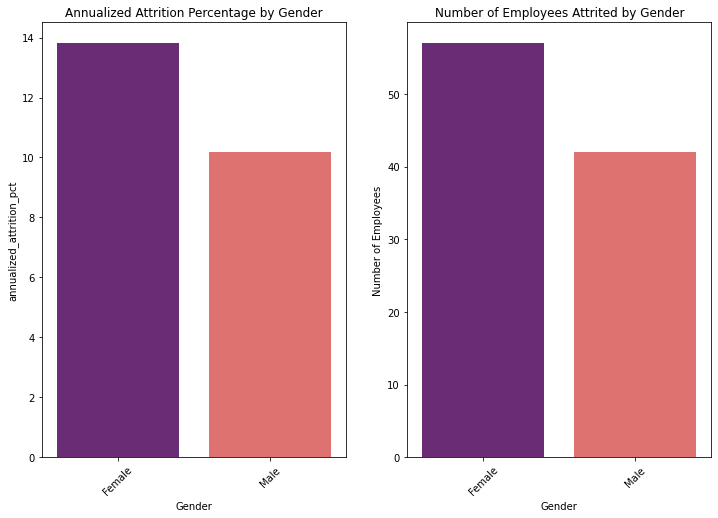

In [5]:
#Exploring annualized attrition rate by gender

rate_by_gender = attrition_rate('Gender', df)

attrition_graph(rate_by_gender, 'magma', 'Gender')

Text(0.5, 1.0, 'Number of Employees Attrited by Tenure')

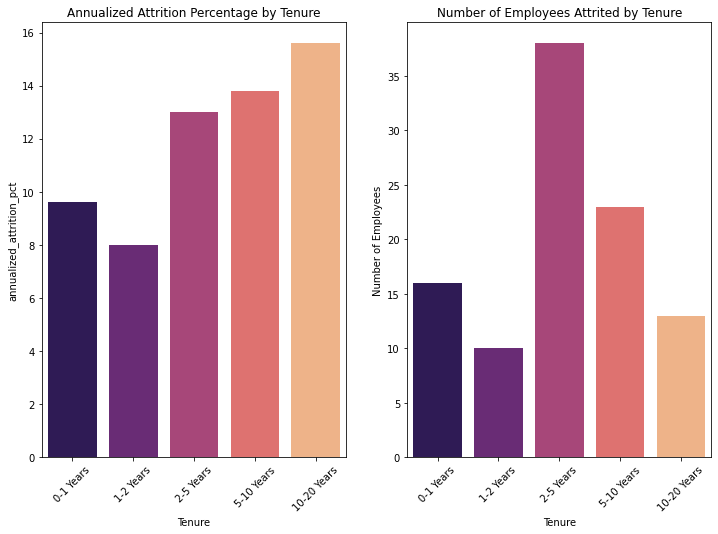

In [7]:
#Exploring annualized attrition rate by tenure

#Grouping employees by tenure ranges

tenure = []
for value in df["Start Date"]:
    if value >= pd.to_datetime('2021-07-01'):
        tenure.append("0-1 Years")
    elif value < pd.to_datetime('2021-07-01') and value >= pd.to_datetime('2020-07-01'):
        tenure.append("1-2 Years")
    elif value < pd.to_datetime('2020-07-01') and value >= pd.to_datetime('2017-07-01'):
        tenure.append("2-5 Years")
    elif value < pd.to_datetime('2017-07-01') and value >= pd.to_datetime('2012-07-01'):
        tenure.append("5-10 Years")
    elif value < pd.to_datetime('2012-07-01') and value >= pd.to_datetime('2002-07-01'):
        tenure.append("10-20 Years")

df['Tenure'] = tenure

rate_by_tenure = attrition_rate('Tenure', df)
tenure_order = ['0-1 Years', '1-2 Years', '2-5 Years', '5-10 Years', '10-20 Years']

#The x-axis comes out in the wrong order so we need to do this one manually

fig, ax = plt.subplots(1,2, figsize=(12,8))
chart = sns.barplot(x=rate_by_tenure.index, 
                    y='annualized_attrition_pct', 
                    data=rate_by_tenure,
                    palette='magma',
                    order=tenure_order,
                    ax=ax[0])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.set_title('Annualized Attrition Percentage by Tenure')

attrition_count = sns.barplot(x=rate_by_tenure.index, 
                               y='Inactive', 
                               data=rate_by_tenure,
                               palette='magma',
                               order=tenure_order,
                               ax=ax[1])
    
attrition_count.set_xticklabels(attrition_count.get_xticklabels(), rotation=45)
attrition_count.set_ylabel('Number of Employees')
attrition_count.set_title('Number of Employees Attrited by Tenure')

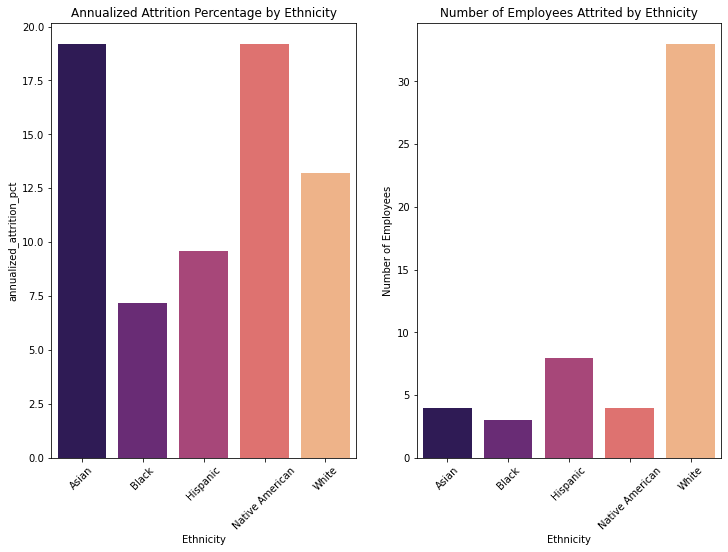

In [8]:
#Exploring annualized attrtition rate by ethnicity of US employees

us_employees = df[df['Country'] == 'United States']

rate_by_ethnicity = attrition_rate('Ethnicity', us_employees)

attrition_graph(rate_by_ethnicity, 'magma', 'Ethnicity')

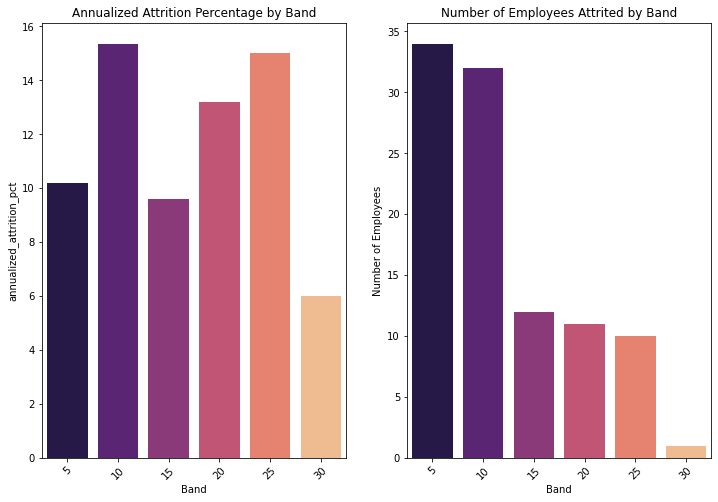

In [9]:
#Exploring attrition rate by band

rate_by_band = attrition_rate('Band', df)

attrition_graph(rate_by_band, 'magma', 'Band')

<bound method Figure.show of <Figure size 864x576 with 2 Axes>>

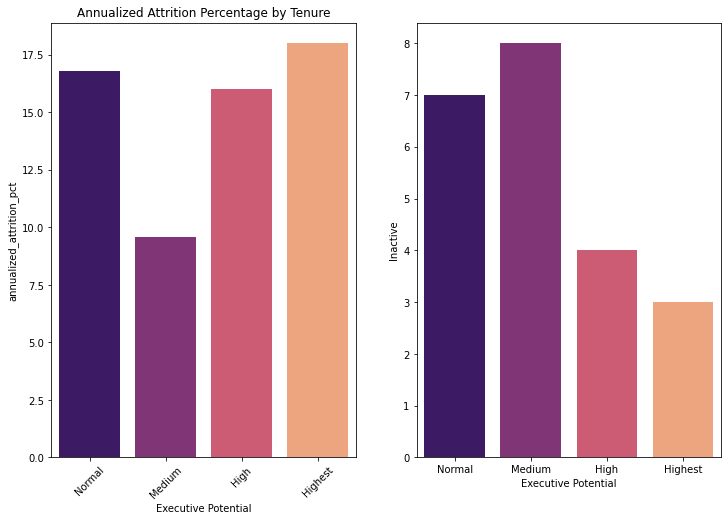

In [12]:
#Exploring attrition rate by executive potential

#Filtering for employees where has potential is not null
has_potential = df[df['Executive Potential'].isna() == False]
potential_order = ['Normal', 'Medium', 'High', 'Highest']

by_exec_potential = attrition_rate('Executive Potential', has_potential)

#Similar to tenure, we need to reorder the categories here too
fig, ax = plt.subplots(1,2, figsize=(12,8))
chart = sns.barplot(x=by_exec_potential.index, 
                    y='annualized_attrition_pct', 
                    data=by_exec_potential,
                    palette='magma',
                    order=potential_order,
                    ax=ax[0])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.set_title('Annualized Attrition Percentage by Tenure')

attrition_count = sns.barplot(x=by_exec_potential.index, 
                              y='Inactive', 
                              data=by_exec_potential,
                              palette='magma',
                              order=potential_order,
                              ax=ax[1])

fig.show